In [1]:
import sys
!{sys.executable} -m pip install chardet

# Задание 1

## 1. Чтение данных

In [28]:
import numpy as np
import os

gen_file = 'global-electricity-generation.csv'
cons_file = 'global-electricity-consumption.csv'

def read_years(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        header = f.readline().strip().split(',')
    return header[1:]

years_gen = read_years(gen_file)
years_cons = read_years(cons_file)

years = years_gen
num_years = len(years)

countries = np.genfromtxt(gen_file, delimiter=',', skip_header=1, usecols=0, dtype=str, encoding='utf-8')

cols = tuple(range(1, 1 + num_years))
production = np.genfromtxt(gen_file, delimiter=',', skip_header=1, usecols=cols, dtype=float, encoding='utf-8')
consumption = np.genfromtxt(cons_file, delimiter=',', skip_header=1, usecols=cols, dtype=float, encoding='utf-8')

year_to_index = {y: i for i, y in enumerate(years)}

## 3.1 Суммарное (по всем странам) потребление электроэнергии за каждый год.

In [22]:
total_consumption_per_year = np.nansum(consumption, axis=0)

print('Года (столбцы):', years)
print('\n3.1 Суммарное потребление по годам (млрд. кВт*ч):')
print(total_consumption_per_year)

Года (столбцы): ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

3.1 Суммарное потребление по годам (млрд. кВт*ч):
[10569.01620096 10854.56291897 11104.65383426 11476.47904131
 11805.86547273 12122.03311393 12419.80887326 12685.75413125
 13230.24950221 13486.48970448 13938.77879299 14455.56232878
 15128.09797911 15725.98237628 16438.21377084 17205.11980814
 17477.47100677 17435.68735807 18748.16072401 19438.82349584
 19918.25495428 20573.09641373 20981.239762   21400.01776982
 22022.68687939 22716.20610151 23530.92004845 23915.65649767
 23959.68010944 25336.70701018]


## 3.2 Максимальное количество электроэнергии, которое произвела одна страна за один год

In [23]:
max_production_single_year = np.nanmax(production)

print('\n3.2 Максимальное производство одной страны за один год (млрд. кВт*ч):', max_production_single_year)


3.2 Максимальное производство одной страны за один год (млрд. кВт*ч): 8151.518231


## 3.3 Список стран, которые производят более 500 млрд. кВт*ч ежегодно в среднем за последние 5 лет

In [24]:
last5_prod_mean = np.nanmean(production[:, -5:], axis=1)
countries_over_500 = countries[last5_prod_mean > 500]

print('\n3.3 Страны с средним производством > 500 (последние 5 лет):')
for c in countries_over_500:
    print(' -', c)


3.3 Страны с средним производством > 500 (последние 5 лет):
 - Russia
 - France
 - Germany
 - China
 - India
 - Japan
 - South Korea
 - Canada
 - United States
 - Brazil


/var/folders/_4/q5bzk7rx44s7kbm8qbfh8yfh0000gn/T/ipykernel_65501/995789541.py:3: RuntimeWarning: Mean of empty slice
  last5_prod_mean = np.nanmean(production[:, -5:], axis=1)  # среднее по последним 5 годам для каждой страны


## 3.4 10% стран, которые потребляют больше всего электроэнергии ежегодно в среднем за последние 5 лет

In [25]:
last5_cons_mean = np.nanmean(consumption[:, -5:], axis=1)
quantile_90 = np.nanquantile(last5_cons_mean, 0.9)
top_10_percent_countries = countries[last5_cons_mean >= quantile_90]

print('\n3.4 Верхние 10% стран по среднему потреблению (последние 5 лет):')
for c in top_10_percent_countries:
    print(' -', c)


3.4 Верхние 10% стран по среднему потреблению (последние 5 лет):
 - South Africa
 - Russia
 - France
 - Germany
 - Italy
 - Spain
 - Turkiye
 - United Kingdom
 - Australia
 - China
 - India
 - Indonesia
 - Japan
 - South Korea
 - Taiwan
 - Vietnam
 - Iran
 - Saudi Arabia
 - Canada
 - Mexico
 - United States
 - Brazil


## 3.5 Список стран, которые увеличили производство в 2021 по сравнению с 1992 более чем в 10 раз

In [26]:
idx1992 = year_to_index['1992']
idx2021 = year_to_index['2021']
prod1992 = production[:, idx1992]
prod2021 = production[:, idx2021]

valid_mask = (~np.isnan(prod1992)) & (~np.isnan(prod2021)) & (prod1992 > 0)
countries_10x_increase = countries[(prod2021 / prod1992 > 10) & valid_mask]

print('\n3.5 Страны, увеличившие производство в 2021 по сравнению с 1992 более чем в 10 раз:')
for c in countries_10x_increase:
    print(' -', c)


3.5 Страны, увеличившие производство в 2021 по сравнению с 1992 более чем в 10 раз:
 - Angola
 - Benin
 - Equatorial Guinea
 - Ethiopia
 - Mali
 - Mauritania
 - Mozambique
 - Sudan
 - Cambodia
 - China
 - Laos
 - Maldives
 - Vietnam
 - Turks and Caicos Islands


/var/folders/_4/q5bzk7rx44s7kbm8qbfh8yfh0000gn/T/ipykernel_65501/4151498077.py:11: RuntimeWarning: divide by zero encountered in divide
  countries_10x_increase = countries[(prod2021 / prod1992 > 10) & valid_mask]
/var/folders/_4/q5bzk7rx44s7kbm8qbfh8yfh0000gn/T/ipykernel_65501/4151498077.py:11: RuntimeWarning: invalid value encountered in divide
  countries_10x_increase = countries[(prod2021 / prod1992 > 10) & valid_mask]


## 3.6 Список стран, которые в сумме за все годы потратили больше 100 млрд. и при этом произвели меньше, чем потратили

In [27]:
total_consumption_per_country = np.nansum(consumption, axis=1)
total_production_per_country = np.nansum(production, axis=1)
mask6 = (total_consumption_per_country > 100) & (total_production_per_country < total_consumption_per_country)
countries_spent_gt100_and_below_prod = countries[mask6]

print('\n3.6 Страны, суммарно потратившие >100 и при этом произвели меньше, чем потратили:')
for c in countries_spent_gt100_and_below_prod:
    print(' -', c)


3.6 Страны, суммарно потратившие >100 и при этом произвели меньше, чем потратили:
 - Zimbabwe
 - Belarus
 - Moldova
 - Belgium
 - Croatia
 - Finland
 - Hungary
 - Italy
 - Latvia
 - Luxembourg
 - Netherlands
 - North Macedonia
 - Hong Kong


## 3.7 Какая страна потратила наибольшее количество электроэнергии в 2020 году?

In [29]:
idx2020 = year_to_index['2020']

idx_max_2020 = np.nanargmax(consumption[:, idx2020])
country_max_2020 = countries[idx_max_2020]

print('\n3.7 Страна с наибольшим потреблением в 2020 году:', country_max_2020)


3.7 Страна с наибольшим потреблением в 2020 году: China


# Задание 2

## 1. Загрузка данных
x – скидка
y – прибыль

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

data = np.genfromtxt(
    "data2.csv",
    delimiter=';', 
    dtype=float,
    encoding='utf-8-sig'
)
x = data[:, 0]
y = data[:, 1]


[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
[-7.69796582 -6.57266488 -5.37046782 -3.15858504 -1.48270657 -0.12384439
  2.40389623  4.14683298  6.32790239  8.82291549 10.88542758 13.31557662
 15.47213024 17.26743396 18.81843147 20.6263378  23.04006768 23.92053257
 25.32216894 26.52298732 26.76261011 27.65896563 27.35973442 27.37007024
 26.15215361 25.23920411]


## 2. Квадратичный полином (2-я степень)
Берём 3 точки: первая, середина, последняя. \
Для полинома f(x) = a2*x^2 + a1*x + a0 нужно составить матрицу:

In [33]:
idxs = [0, len(x)//2, -1]  
x3 = x[idxs]
y3 = y[idxs]

A2 = np.vstack([x3**2, x3, np.ones_like(x3)]).T
b2 = y3

coeff2 = solve(A2, b2)
print("Коэффициенты квадратичного полинома:", coeff2)


[0.  2.6 5. ]
[-7.69796582 17.26743396 25.23920411]
[[ 0.    0.    1.  ]
 [ 6.76  2.6   1.  ]
 [25.    5.    1.  ]]
Коэффициенты квадратичного полинома: [-1.25610119 12.86793993 -7.69796582]


 Получаем значения полинома и считаем RSS

In [16]:
f2 = coeff2[0]*x**2 + coeff2[1]*x + coeff2[2]

RSS2 = np.sum((y - f2)**2)
print("RSS (полином 2-й степени):", RSS2)


[-7.69796582 -5.17462188 -2.75176604 -0.42939829  1.79248136  3.91387292
  5.93477638  7.85519175  9.67511902 11.3945582  13.01350928 14.53197227
 15.94994716 17.26743396 18.48443266 19.60094327 20.61696578 21.5325002
 22.34754652 23.06210475 23.67617488 24.18975691 24.60285086 24.9154567
 25.12757445 25.23920411]
RSS (полином 2-й степени): 163.36349055625158


## 3. Кубический полином (3-я степень)
Аналогично, только 4 точки.

In [13]:
idxs = [0, len(x)//3, 2*len(x)//3, -1]
x4 = x[idxs]
y4 = y[idxs]

A3 = np.vstack([x4**3, x4**2, x4, np.ones_like(x4)]).T
b3 = y4

coeff3 = solve(A3, b3) Е Е
print("Коэффициенты кубического полинома:", coeff3)

f3 = coeff3[0]*x**3 + coeff3[1]*x**2 + coeff3[2]*x + coeff3[3]

RSS3 = np.sum((y - f3)**2)
print("RSS (полином 3-й степени):", RSS3)


Коэффициенты кубического полинома: [-0.58570762  3.22486627  5.10579311 -7.69796582]
RSS (полином 3-й степени): 1.954214546433344


## 4. Построение графиков

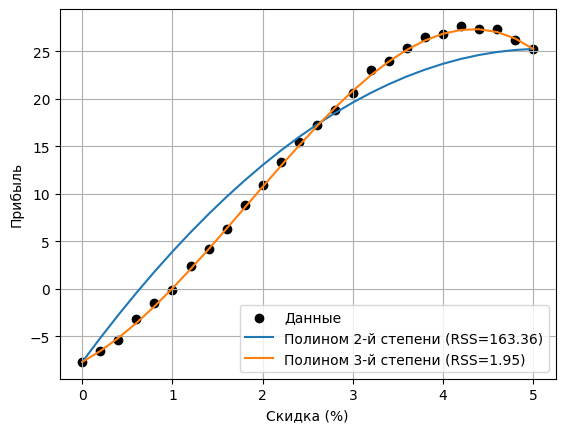

In [14]:
plt.scatter(x, y, label="Данные", color="black")
plt.plot(x, f2, label=f"Полином 2-й степени (RSS={RSS2:.2f})")
plt.plot(x, f3, label=f"Полином 3-й степени (RSS={RSS3:.2f})")
plt.xlabel("Скидка (%)")
plt.ylabel("Прибыль")
plt.legend()
plt.grid()
plt.show()


## 5. Выбор лучшего варианта и прогноз

In [15]:
if RSS2 < RSS3:
    best = "квадратичный"
    coeff = coeff2
    predict = lambda xx: coeff[0]*xx**2 + coeff[1]*xx + coeff[2]
else:
    best = "кубический"
    coeff = coeff3
    predict = lambda xx: coeff[0]*xx**3 + coeff[1]*xx**2 + coeff[2]*xx + coeff[3]

print("Лучший вариант:", best)
print("Прогноз при скидке 6%:", predict(6))
print("Прогноз при скидке 8%:", predict(8))


Лучший вариант: кубический
Прогноз при скидке 6%: 12.51913288020782
Прогноз при скидке 8%: -60.34248049045499
